In [ ]:
!pip install -q pyomo
# solvers needed to be installed separately

# glpk
!apt-get install -y -qq glpk-utils

In [ ]:
from pyomo.environ import *

#### Variables:


```
model.a_variable = Var(within = NonNegativeReals) # can be "Binary"

# e.g.
model.a_variable = Var(bounds = (0, None))
model.a_variable = Var(initialize = 42.0)
model.a_variable = Var(initialize=42.0, bounds=(0, None))
```
#### Objectives:


```
model.obj = Objective(
  expr= (1-model.x)**2 + 100*(model.y-model.x**2)**2,
  sense= minimize )
```



#### Constraints:


```
model.c1 = Constraint(
  expr = model.b + 5 * model.c <= model.a )

model.c2 = Constraint(expr = (None, model.a + model.b, 1))
```
* 3-tuple	specifies	(	LB,	expr,	UB	) 


#### List comprehension: $\sum_{i\in IDX} b_i \leq a$

```
model.c1 = Constraint(
  expr = sum(model.b[i] for i in model.IDX) <= model.a )
```




# Simple Model: Classic	Knapsack	Problem

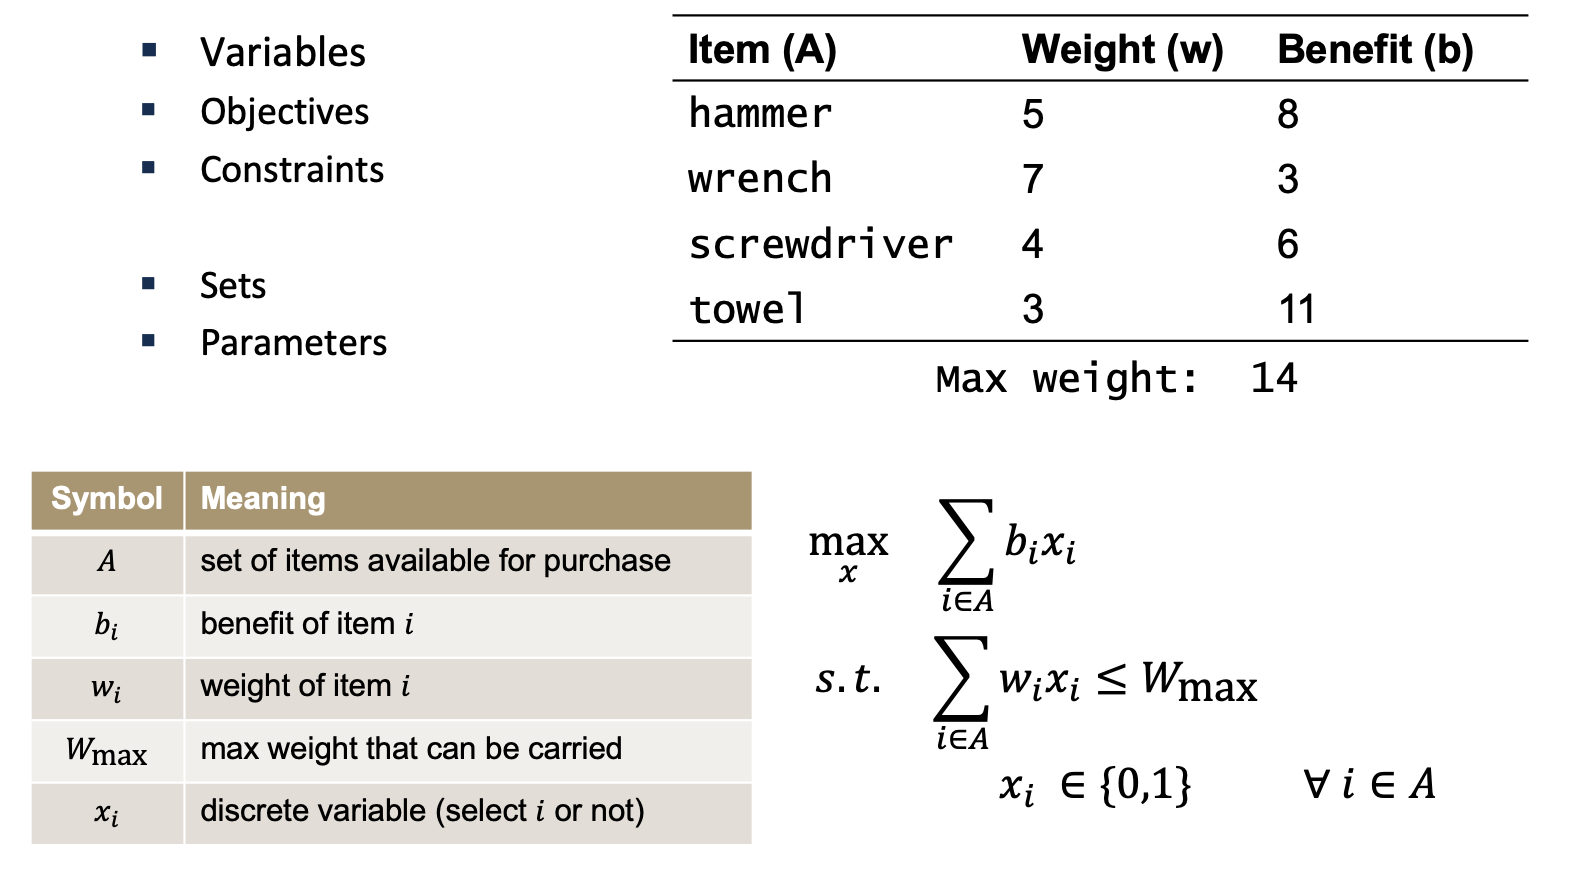

In [ ]:
# entries (variable)
A = ['hammer', 'wrench', 'screwdriver', 'towel']
# benefits - dic type
b = {'hammer':8, 'wrench':3, 'screwdriver':6, 'towel':11}
# weights - dic type
w = {'hammer':5, 'wrench':7, 'screwdriver':4, 'towel':3}
W_max = 14
model = ConcreteModel()
# set variables
model.x = Var( A, within=Binary )

# objective function
model.value = Objective(
expr = sum( b[i]*model.x[i] for i in A),
sense = maximize ) 

# constriants
model.weight = Constraint(
expr = sum( w[i]*model.x[i] for i in A) <= W_max )

# solve
opt = SolverFactory('glpk', executable='/usr/bin/glpsol')
result_obj = opt.solve(model, tee=True)

# print result
model.pprint()

# SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpekqtiucs.glpk.raw --wglp /tmp/tmpur0ltbrt.glpk.glp --cpxlp
 /tmp/tmpyagz7e26.pyomo.lp
Reading problem data from '/tmp/tmpyagz7e26.pyomo.lp'...
/tmp/tmpyagz7e26.pyomo.lp:28: warning: lower bound of variable 'x1' redefined
/tmp/tmpyagz7e26.pyomo.lp:28: warning: upper bound of variable 'x1' redefined
2 rows, 5 columns, 5 non-zeros
4 integer variables, all of which are binary
32 lines were read
Writing problem data to '/tmp/tmpur0ltbrt.glpk.glp'...
22 lines were written
GLPK Integer Optimizer, v4.65
2 rows, 5 columns, 5 non-zeros
4 integer variables, all of which are binary
Preprocessing...
1 constraint coefficient(s) were reduced
1 row, 4 columns, 4 non-zeros
4 integer variables, all of which are binary
Scaling...
 A: min|aij| =  3.000e+00  max|aij| =  5.000e+00  ratio =  1.667e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 1
Solving LP relaxatio

# More	Complex	Model:	Warehouse	Location

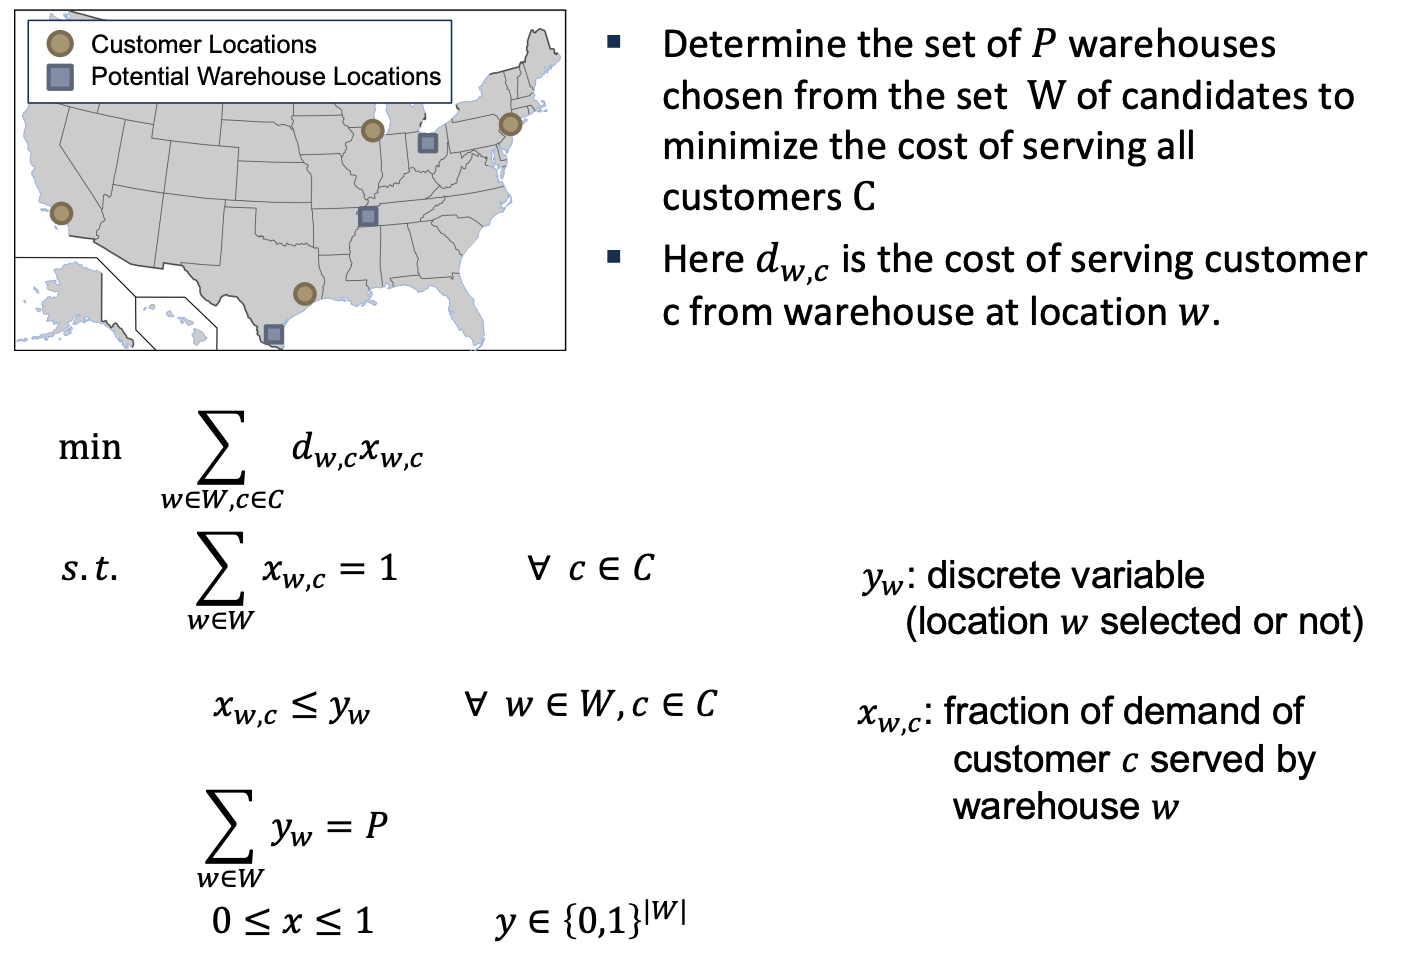

In [ ]:
model = ConcreteModel(name="(WL)")
W = ['Harlingen', 'Memphis', 'Ashland']
C = ['NYC', 'LA', 'Chicago', 'Houston']
d = {('Harlingen', 'NYC'): 1956, \
('Ashland', 'Houston'): 1236 }

P = 2

model.x = Var(W, C, bounds=(0,1))
model.y = Var(W, within=Binary)

def obj_rule(m):
  return sum(d[w,c]*m.x[w,c] for w in W for c in C)
model.obj = Objective(rule=obj_rule)

def one_per_cust_rule(m, c):
  return sum(m.x[w,c] for w in W) == 1
model.one_per_cust = Constraint(C, rule=one_per_cust_rule)

def warehouse_active_rule(m, w, c):
  return m.x[w,c] <= m.y[w]
model.warehouse_active = Constraint(W, C, rule=warehouse_active_rule)

def num_warehouses_rule(m):
  return sum(m.y[w] for w in W) <= P
model.num_warehouses = Constraint(rule=num_warehouses_rule)

SolverFactory('glpk').solve(model)

model.pprint()


ERROR:pyomo.core:Rule failed when generating expression for Objective obj with index None:
KeyError: ('Harlingen', 'LA')
ERROR:pyomo.core:Constructing component 'obj' from data=None failed:
KeyError: ('Harlingen', 'LA')


KeyError: ignored

About Mixed-Integer Linear Program:
https://www.gurobi.com/resource/mip-basics/

About installing Groubi on Colab:
https://support.gurobi.com/hc/en-us/articles/4409582394769-Google-Colab-Installation-and-Licensing#h_01FJX2T7BH8TN5M6F33RE8YF9W